# 2.1

## a)

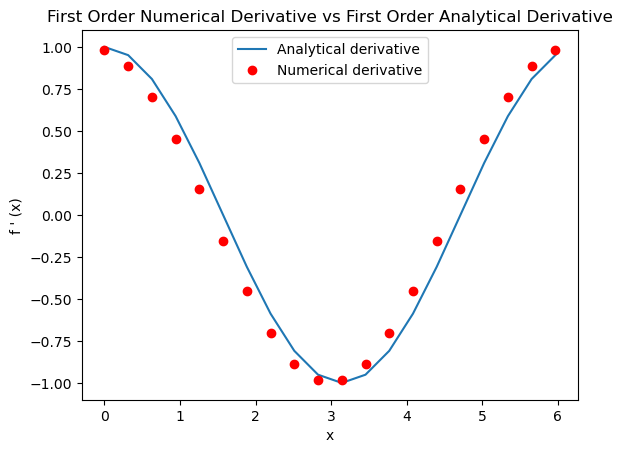

In [26]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
x = np.linspace(0, 2 * np.pi, N, endpoint=False)
dx = 2 * np.pi / N

# Numerical derivative using the given formula
fx = np.sin(x)
f_prime_numerical = (np.roll(fx, -1) - fx) / dx
f_prime_analytical = np.cos(x)


# Plotting
plt.plot(x, f_prime_analytical, label='Analytical derivative')
plt.plot(x, f_prime_numerical, 'ro', label='Numerical derivative')
plt.title('First Order Numerical Derivative vs First Order Analytical Derivative')
plt.xlabel('x')
plt.ylabel("f ' (x)")
plt.legend()
plt.show()

## b)

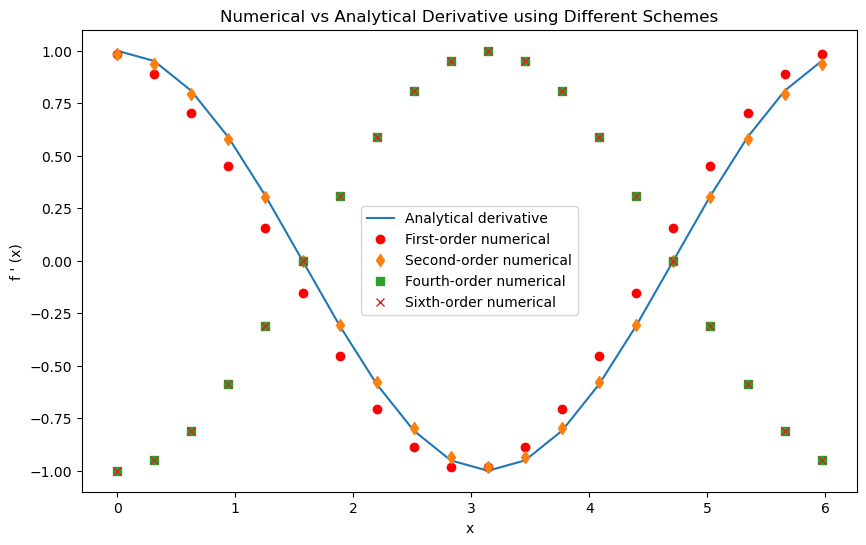

In [27]:
def second_order(fx, dx):
    return (np.roll(fx, -1) - np.roll(fx, 1)) / (2 * dx)

def fourth_order(fx, dx):
    return (-np.roll(fx, 2) + 8 * np.roll(fx, 1) - 8 * np.roll(fx, -1) + np.roll(fx, -2)) / (12 * dx)

def sixth_order(fx, dx):
    return (np.roll(fx, 3) - 9 * np.roll(fx, 2) + 45 * np.roll(fx, 1) - 45 * np.roll(fx, -1) + 9 * np.roll(fx, -2) - np.roll(fx, -3)) / (60 * dx)

f_prime_second_order = second_order(fx, dx)
f_prime_fourth_order = fourth_order(fx, dx)
f_prime_sixth_order = sixth_order(fx, dx)

# Plot the results
# set figure size
plt.figure(figsize=(10, 6)) # otherwise legend is blocking the plot
plt.plot(x, f_prime_analytical, label='Analytical derivative')
plt.plot(x, f_prime_numerical, 'ro', label='First-order numerical')
plt.plot(x, f_prime_second_order, 'd', label='Second-order numerical')
plt.plot(x, f_prime_fourth_order, 's', label='Fourth-order numerical')
plt.plot(x, f_prime_sixth_order, 'x', label='Sixth-order numerical')
plt.xlabel('x')
plt.ylabel("f ' (x)")
plt.legend()
plt.title('Numerical vs Analytical Derivative using Different Schemes')
plt.show()



## c)

In [28]:
max_error_first_order = np.max(np.abs(f_prime_numerical - f_prime_analytical))
max_error_second_order = np.max(np.abs(f_prime_second_order - f_prime_analytical))
max_error_fourth_order = np.max(np.abs(f_prime_fourth_order - f_prime_analytical))
max_error_sixth_order = np.max(np.abs(f_prime_sixth_order - f_prime_analytical))

print(f"Max error (first-order): {max_error_first_order}")
print(f"Max error (second-order): {max_error_second_order}")
print(f"Max error (fourth-order): {max_error_fourth_order}")
print(f"Max error (sixth-order): {max_error_sixth_order}")


Max error (first-order): 0.15579194727527879
Max error (second-order): 0.016368356916534044
Max error (fourth-order): 1.9996790961817419
Max error (sixth-order): 1.9999932634854298


# 2.3

## a)

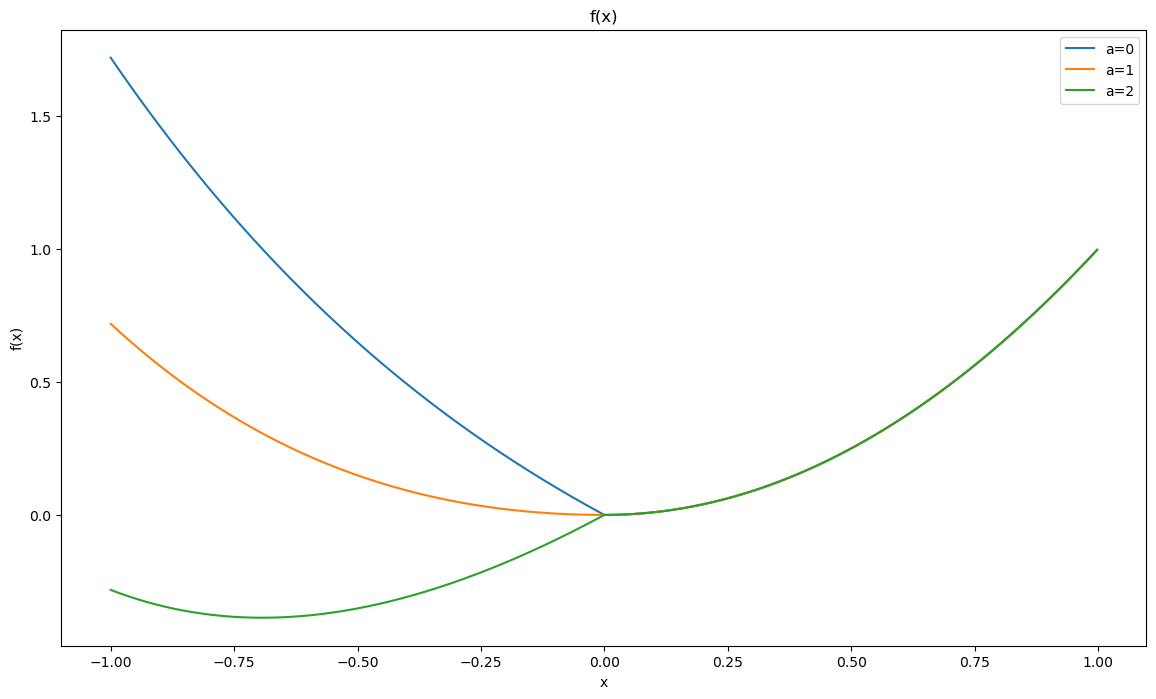

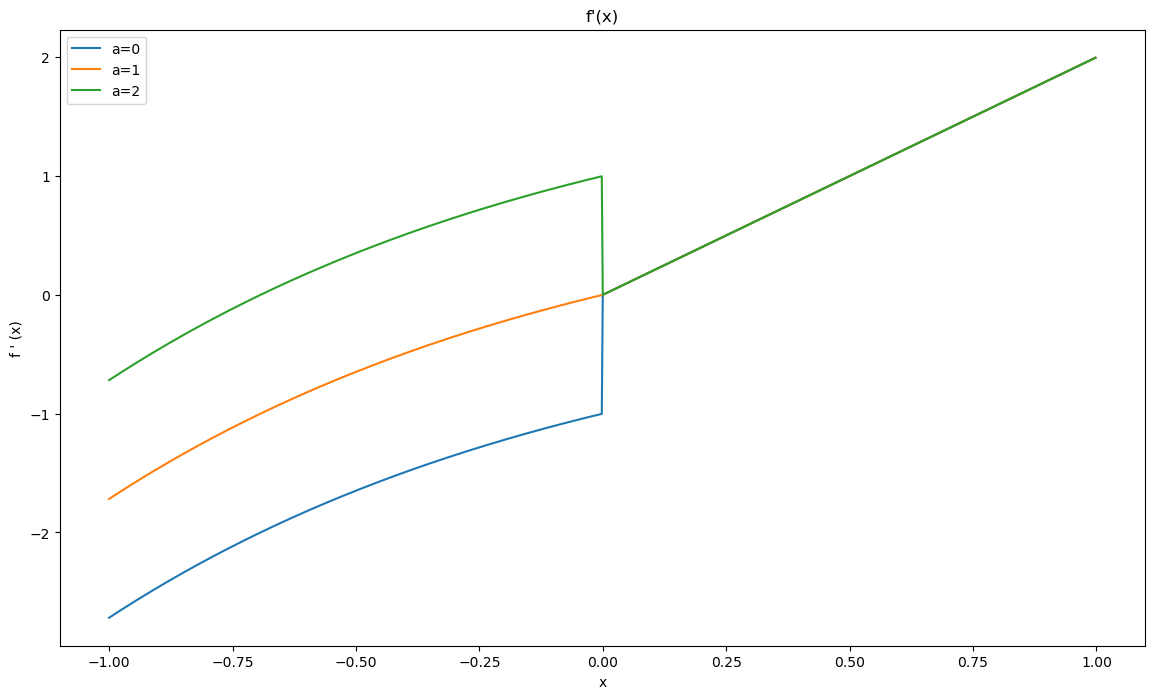

In [32]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(-1, 1, N, endpoint=False)

# Define the function and its analytical derivative using np.piecewise
def f(x, a):
    return np.piecewise(x, [x < 0, x > 0], [lambda x: np.exp(-x) + a * x - 1, lambda x: x**2])

def f_prime(x, a):
    return np.piecewise(x, [x < 0, x > 0], [lambda x: -np.exp(-x) + a, lambda x: 2 * x])

a_values = [0, 1, 2]

# plotting f(x) for different values of a
plt.figure(figsize=(14, 8))
for a in a_values:
    # Define the function and its derivative using np.piecewise
    f_values = f(x, a)
    plt.plot(x, f_values, label=f'a={a}')
    plt.title('f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
plt.show()

# plotting f'(x) for different values of a
plt.figure(figsize=(14, 8))
for a in a_values:
    f_prime_values = f_prime(x, a)
    plt.plot(x, f_prime_values, label=f'a={a}')
    plt.title("f'(x)")
    plt.xlabel('x')
    plt.ylabel("f ' (x)")
    plt.legend()
plt.show()

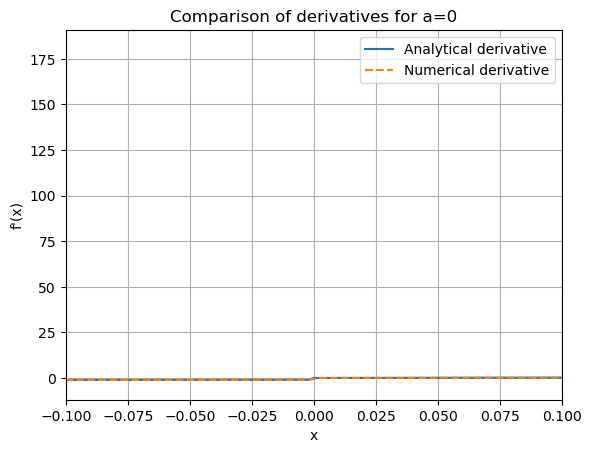

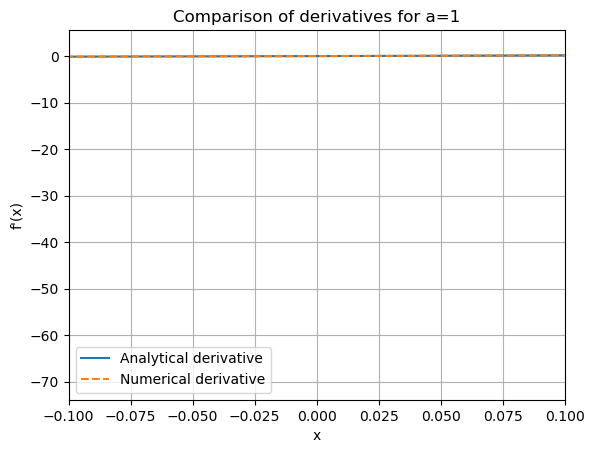

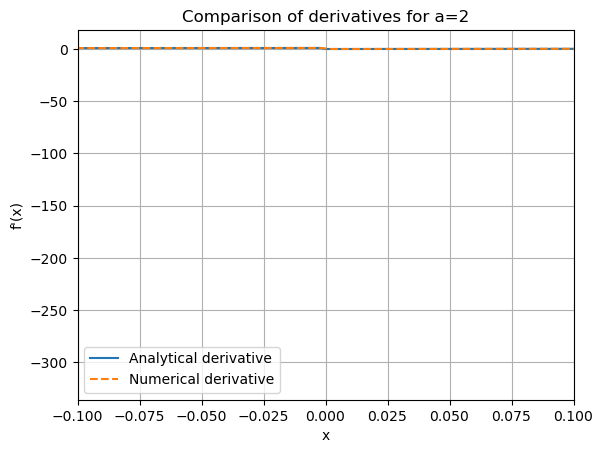

In [31]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(-1, 1, N, endpoint=False)
dx = x[1] - x[0]

# Values of a to test
a_values = [0, 1, 2]

# Central difference scheme for second order derivative
def central_diff(f, dx):
    return (np.roll(f, -1) - np.roll(f, 1)) / (2 * dx)

# Plot results
for a in a_values:
    f_values = f(x, a)
    f_prime_analytical = f_prime(x, a)
    f_prime_numerical = central_diff(f_values, dx)
    
    plt.figure()
    plt.plot(x, f_prime_analytical, label='Analytical derivative')
    plt.plot(x, f_prime_numerical, label='Numerical derivative', linestyle='--')
    plt.title(f'Comparison of derivatives for a={a}')
    plt.xlabel('x')
    plt.ylabel('f\'(x)')
    plt.legend()
    plt.grid(True)
    plt.xlim(-0.1, 0.1)  # Zoom in near x=0
    plt.show()
